In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import data files and perform data cleaning

In [2]:
#import CSV files
#A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product
user_engagement = pd.read_csv("takehome_user_engagement.csv")
user_engagement =user_engagement.set_index(pd.DatetimeIndex(user_engagement['time_stamp']))
#A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years
users = pd.read_csv('takehome_users.csv', encoding='latin-1')


In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
print(user_engagement.head())

                              time_stamp  user_id  visited
time_stamp                                                
2014-04-22 03:53:30  2014-04-22 03:53:30        1        1
2013-11-15 03:45:04  2013-11-15 03:45:04        2        1
2013-11-29 03:45:04  2013-11-29 03:45:04        2        1
2013-12-09 03:45:04  2013-12-09 03:45:04        2        1
2013-12-25 03:45:04  2013-12-25 03:45:04        2        1


In [5]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


In [6]:
#groups by user, then date by week, and sums number of visits per week
grouped = user_engagement.groupby('user_id').resample('1W').sum()
#removes weeks that were imputed for grouping but are NaN
grouped = grouped[grouped['user_id'].isnull()==False].drop('user_id',axis=1)
grouped.head(10)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1

In [7]:
#tags weeks that had less than 3 visits for all users#tags w 
active_users = grouped['visited']>=3


In [10]:
#Groups by users and sums up the number of weeks that had 3 or more visits
active_users = active_users.groupby(level=0).apply(np.sum)

In [11]:
#removes users with no weeks that had 3 or more visits
active_users = active_users[active_users!=0]
active_users = pd.DataFrame(active_users,index=active_users.index)
active_users.columns = ['Active Weeks']
active_users.head(5)

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68


In [12]:
act_user_data = active_users.merge(users,left_index=True,right_on='object_id',how='inner')
act_user_data.head()

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN


In [13]:
act_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 1 to 11987
Data columns (total 11 columns):
Active Weeks                  1445 non-null int64
object_id                     1445 non-null int64
creation_time                 1445 non-null object
name                          1445 non-null object
email                         1445 non-null object
creation_source               1445 non-null object
last_session_creation_time    1445 non-null float64
opted_in_to_mailing_list      1445 non-null int64
enabled_for_marketing_drip    1445 non-null int64
org_id                        1445 non-null int64
invited_by_user_id            817 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 135.5+ KB


In [14]:
#Create the target feature 'adopted_user'
act_user_data['adopted_user']=1

#Add Active column to origional Data
users['Active']=int(0)
users.iloc[list(act_user_data.index),10]=1
model_data = users.set_index('object_id').sort_index()

#Prep data for modeling by removing unecessary features
model_data = model_data.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = model_data.pop('creation_time')
model_data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [15]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 6 columns):
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Active                        12000 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


In [16]:
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].fillna(0)
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)
model_data = pd.get_dummies(data=model_data,columns=['creation_source'])

In [17]:
model_data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,1,0,11,1,0,1,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0
3,0,0,94,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,193,1,0,1,0,0,0,0


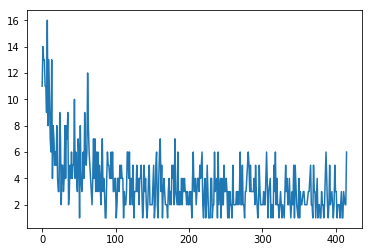

In [31]:
# Check the counts of org_id the users belong. There are slightly more than 400 organizations people belong to.
plt.plot(model_data.Active[model_data.Active ==1].groupby(model_data.org_id).count())
plt.show()

In [19]:
#Create dummies for org_id
model_data2 = pd.get_dummies(data=model_data,columns=['org_id'])

In [20]:
model_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Columns: 426 entries, opted_in_to_mailing_list to org_id_416
dtypes: int64(4), uint8(422)
memory usage: 5.6 MB


In [21]:
model_data2.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
object_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data into train and test sets

In [22]:
#Split data to train and test sets
from sklearn.model_selection import GridSearchCV,train_test_split

X = model_data2.drop('Active', axis=1)
y = model_data2['Active']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

### Machine learning- Decision Tree Classifier 
We need to find out the features that influence user conversion to "Adopted' 

In [23]:
# Decision Classifer to check feature importance
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
import time
start = time.process_time()  

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10, class_weight ='balanced').fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

#Accuracy 
accuracy = dtree_model.score(X_test, y_test)
print('Model Accuracy: '+ str(accuracy))


importance = dtree_model.feature_importances_
importance = pd.DataFrame(importance,  index =X.columns, columns=["Importance",])
importance = importance.sort_values(['Importance'], ascending=False).head(10)
print('*************************************')
print('Feature Importance is {}'.format(importance))
print('*************************************')
print('process time: {}'.format(time.process_time() - start))

Model Accuracy: 0.5656666666666667
*************************************
Feature Importance is                                    Importance
creation_source_PERSONAL_PROJECTS    0.244967
org_id_0                             0.117164
creation_source_ORG_INVITE           0.069396
org_id_18                            0.036764
org_id_217                           0.036529
org_id_22                            0.032890
org_id_5                             0.030196
org_id_36                            0.027701
org_id_21                            0.027561
org_id_6                             0.027228
*************************************
process time: 0.421875


####  Decision Tree Classifer Solution
Since the number of adoptions is 1445/12000 (12%) of the users, the model needs to be balanced with class_weight = "balanced" parameter. 

#### Feature Importance:                                     

The above table of feature importance suggests Creation Source and Org_id of the users play a critical role in "adoption" by the users

In [24]:
#confusion matrix

cm = confusion_matrix(y_test,dtree_predictions)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,1509,1126
1,177,188


In [25]:
y_test.value_counts()

0    2635
1     365
Name: Active, dtype: int64

In [26]:
#training accuracy
accuracy1 = dtree_model.score(X_train, y_train)
print('Training Model Accuracy: '+ str(accuracy1))

Training Model Accuracy: 0.5812222222222222


#### Try another method: Gradient Boosting Classifier

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.880
Accuracy score (test): 0.878
Learning rate:  0.075
Accuracy score (training): 0.880
Accuracy score (test): 0.878
Learning rate:  0.1
Accuracy score (training): 0.880
Accuracy score (test): 0.878
Learning rate:  0.25
Accuracy score (training): 0.880
Accuracy score (test): 0.878
Learning rate:  0.5
Accuracy score (training): 0.881
Accuracy score (test): 0.878
Learning rate:  0.75
Accuracy score (training): 0.880
Accuracy score (test): 0.874
Learning rate:  1
Accuracy score (training): 0.879
Accuracy score (test): 0.871


In [29]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[2635    0]
 [ 365    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2635
           1       0.00      0.00      0.00       365

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.77      0.88      0.82      3000



C:\Users\GG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
importance1 = gb_clf2.feature_importances_
importance1 = pd.DataFrame(importance1,  index =X.columns, columns=["Importance",])
importance1 = importance1.sort_values(['Importance'], ascending=False).head(10)
print('*************************************')
print('Feature Importance is {}'.format(importance1))
print('*************************************')
print('process time: {}'.format(time.process_time() - start))

*************************************
Feature Importance is                                     Importance
creation_source_SIGNUP_GOOGLE_AUTH    0.141360
org_id_161                            0.098125
org_id_415                            0.083240
org_id_399                            0.069336
org_id_248                            0.063000
invited_by_user_id                    0.049814
org_id_205                            0.040888
org_id_251                            0.034513
creation_source_ORG_INVITE            0.033047
org_id_143                            0.027560
*************************************
process time: 3.859375


### Solution
Even though the accuracy is higher for GBC Classifier, since the data is imbalanced, the Confusion Matrix shows no data for 'Adopted Users'. This happens due to imbalance with only 12% of the users are Adopted and the rest of the users are not.

Decision Tree Classifier is a good method to predict results.  
In both models, the Creation Source and org_id of the users are important to user conversion to "Adopted users".